In [7]:
# Heart Failure Detection Project (Advanced Data Science)

# This notebook demonstrates data preprocessing, visualization, and modeling using
# advanced techniques (ANN, SVM, CNN where applicable) for the classification task
# of predicting mortality events in congestive heart failure patients.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, fbeta_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.api.models import Sequential # from tensorflow.keras.models import Sequential
from keras.api.layers import Dense, Dropout # from tensorflow.keras.layers import Dense, Dropout
from keras.api.callbacks import EarlyStopping # from tensorflow.keras.callbacks import EarlyStopping

# Load data
url = '/Users/super/proj/py/notebook-playground/notebooks/4662/CS4662_Project/data/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv'  # replace with actual path or URL
df = pd.read_csv(url)

# Drop 'time' as per dataset notes (future information)
df = df.drop(columns=['time'])

# Separate target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

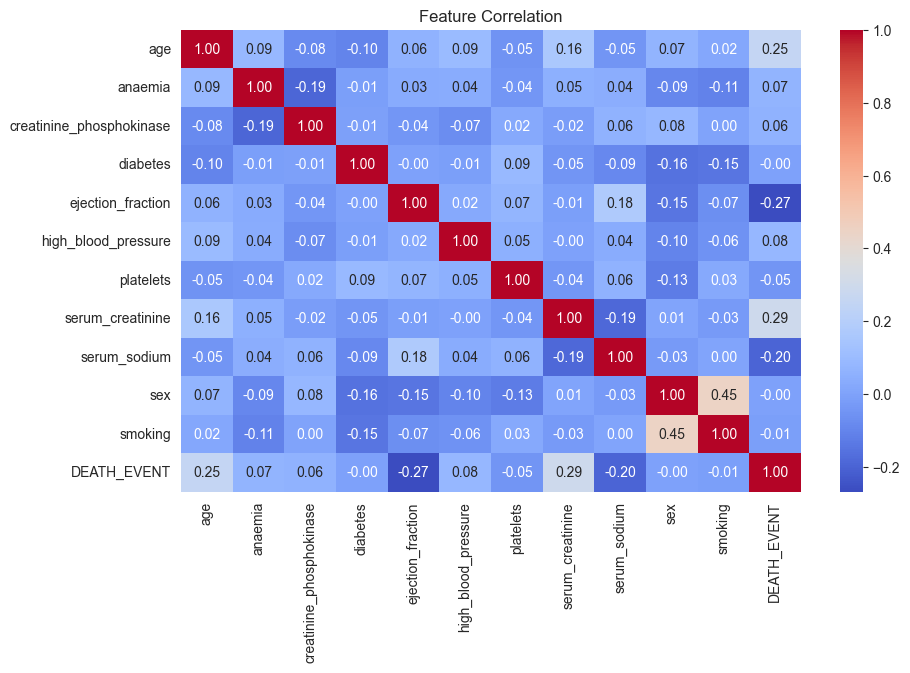

In [9]:
# --- SVM Classifier ---
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print("F2 Score:", fbeta_score(y_test, y_pred_svm, beta=2))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.50      0.53      0.51        19

    accuracy                           0.68        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.69      0.68      0.69        60

F2 Score: 0.5208333333333334


In [10]:
# --- ANN using sklearn MLPClassifier ---
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("\nMLPClassifier Report:")
print(classification_report(y_test, y_pred_mlp, zero_division=0))
print("F2 Score:", fbeta_score(y_test, y_pred_mlp, beta=2))


MLPClassifier Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.47      0.37      0.41        19

    accuracy                           0.67        60
   macro avg       0.60      0.59      0.59        60
weighted avg       0.65      0.67      0.65        60

F2 Score: 0.38461538461538464


/Users/super/Library/Caches/pypoetry/virtualenvs/notebook-playground-15lMjr8f-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# --- Deep Learning with Keras ---
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train, validation_split=0.2,
    epochs=100, batch_size=16, callbacks=[early_stop], verbose=0
)

/Users/super/Library/Caches/pypoetry/virtualenvs/notebook-playground-15lMjr8f-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Evaluate on test set
keras_pred = model.predict(X_test_scaled).flatten() > 0.5
print("\nKeras Neural Network Report:")
print(classification_report(y_test, keras_pred, zero_division=0))
print("F2 Score:", fbeta_score(y_test, keras_pred, beta=2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Keras Neural Network Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        41
           1       0.58      0.37      0.45        19

    accuracy                           0.72        60
   macro avg       0.67      0.62      0.63        60
weighted avg       0.70      0.72      0.70        60

F2 Score: 0.3977272727272727


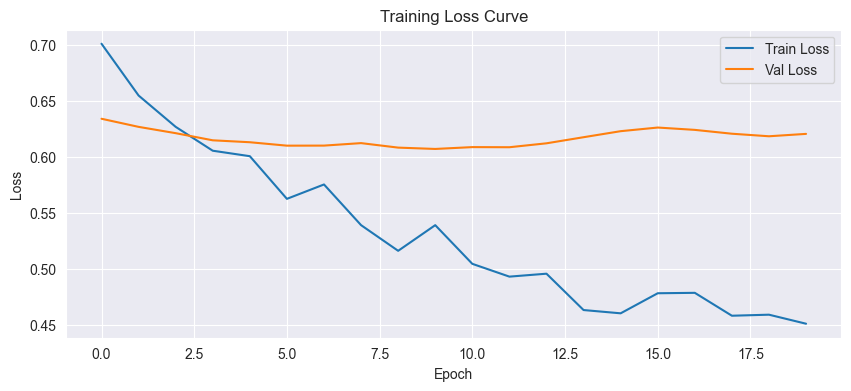

In [13]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

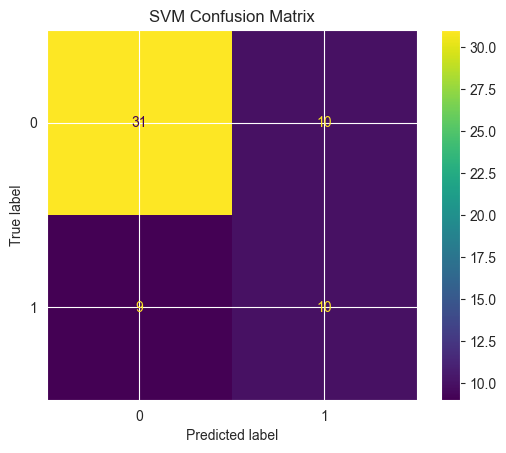

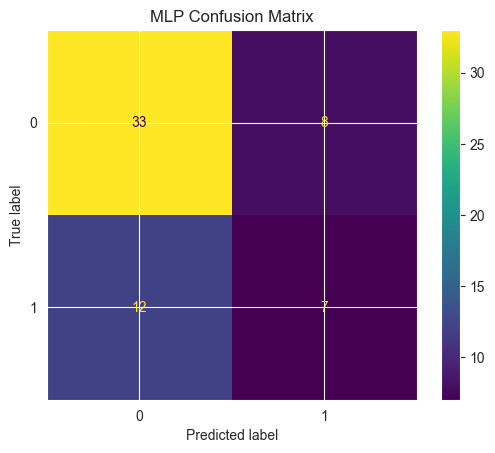

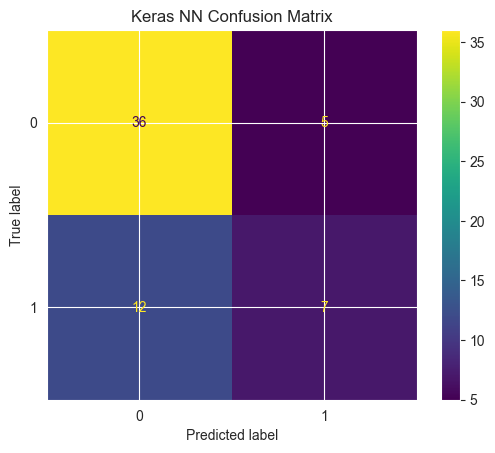

In [14]:
# Optionally: Confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("SVM Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.title("MLP Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, keras_pred)
plt.title("Keras NN Confusion Matrix")
plt.show()
